<a href="https://colab.research.google.com/github/alatieh/Statistics-of-the-Sea-Ice/blob/main/ICE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I will invistigate the Sea Ice Extent.  
First I will invistigate the statistics of the Ice extent in the northern and Southern Hemisphere.  
Then I will try to find if there is a relation between Ice extent and (Sea Surface Temperture, fresh water input from rivers).

In [ ]:
# # install these packages if needed
# install.packages("animation")
# install.packages("magick")
# install.packages('gganimate')
# install.packages('transformr')
# install.packages('gifski')

In [ ]:
# importing the needed libraries
library(tidyverse)
library(readxl)
library(ggplot2)
library(gganimate)
library(transformr)
library(gifski)


# Importing the Sea Icea data base from NSIDC

We used the 'Sea ice extent and area organized by year' data. It is obtained from National Snow and Ice Data Center NSIDC [website](https://nsidc.org/arcticseaicenews/sea-ice-tools/)


We will use the NH-Extent and SH-Extent data which contains sea ice extent data for the respective hemisphere. We chose the variable _Ice Sea Extent_ from the data because it is measured with a higher certainty than the _Ice Sea Area_ variable.

Since the NSIDC data in Excel format, we invistigated it first in excel in our preliminary analysis. The data that we need ( The NH_sea_Ice and the SH_sea_Ice are the sheets 1 and 3)

In [ ]:
# In this part of the code we download the excel from the NSIDC website.
# Then, In the next two steps:
#							We will work out the data from North Hemisphere NH sea ice
#							Then we will repeat the same work on data the South Hemisphere SH sea ice

# importing Sea ice extent and area organized by year from the NSIDC website
NSIDC_url <- "https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx"

# Download the excel file to a temporary location
temp_file_NSIDC <- tempfile()
download.file(NSIDC_url, temp_file_NSIDC, mode = "wb")

## Importing the North Hemisphere NH sea ice

 The North Hemisphere NH sea ice data is on the sheet (1) from the excel file. It has the monthly values and annual ones. I will wrangle this sheet and make it two times series:  
 The _NH_monthly_ for the **Monthly** Sea Ice in the northeren Hemisphere.  
 The _NH_annual_ for **Annual** Sea Ice in the northeren Hemisphere.


### Monthly North Hemisphere sea ice ``NH_monthly``

In [ ]:
# Read sheet (1) from the excel file
NH_monthly <- read_excel(temp_file_NSIDC, sheet = 1)

# Rename the A column to 'year'
colnames(NH_monthly)[1] <- 'year'

# Remove the column N and O because;
#				column N is empty
#				column O has inncorrected 'Annual' value based on missing data
NH_monthly <- NH_monthly[, -c(14, 15)]


# View the data
NH_monthly

New names:
• `` -> `...1`
• `` -> `...14`


year,January,February,March,April,May,June,July,August,September,October,November,December
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1978,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,11.645,13.667
1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336
1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593
1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341
1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642
1983,14.942,16.006,16.085,15.172,13.491,12.296,10.570,8.186,7.395,9.334,11.461,13.299
1984,14.473,15.299,15.584,15.015,13.577,12.152,9.977,7.771,6.805,8.561,10.842,12.989
1985,14.725,15.466,15.886,15.357,14.073,12.219,9.744,7.402,6.698,8.546,11.025,13.050
1986,14.890,15.785,15.910,15.059,13.379,11.976,10.146,7.979,7.411,9.484,11.453,13.222


In [ ]:
# Remove the first column of the data
NH_monthly <- NH_monthly[, -1]

# use pivot longer and keep only the data
NH_monthly <- pivot_longer(NH_monthly, January:December, names_to = "month", values_to = "extent_NH")[, "extent_NH"]

# Add the time_series as a date index column to NH_Extent_NSIDC_column
time_series <- seq(from = as.Date("1978-01-15"), to = as.Date("2023-12-15"), by = "1 month")
NH_monthly$date <- as.Date(time_series)

# We are doing this research in begin October 2023
# We need to remove the last three rows of NH_Extent_NSIDC_column because there is no measurments yet for all 2023
# There are also no measurments in the first ten months of 1978
NH_monthly <- NH_monthly[11:(nrow(NH_monthly)-3), ]

# Add (the year as integer) as a new column in NH_monthly
# This integer will be used later in the animation plot
NH_monthly$year <- as.integer(format(NH_monthly$date, "%Y"))

# Change the columns order
NH_monthly <-NH_monthly[,3:1]

# View the updated dataframe
NH_monthly

year,date,extent_NH
<int>,<date>,<dbl>
1978,1978-11-15,11.645
1978,1978-12-15,13.667
1979,1979-01-15,15.414
1979,1979-02-15,16.175
1979,1979-03-15,16.342
1979,1979-04-15,15.447
1979,1979-05-15,13.857
1979,1979-06-15,12.530
1979,1979-07-15,10.311


In [ ]:
# Here we will print out which measurment is missing in our NH data
missing_indices <- which(is.na(NH_monthly[['extent_NH']]))
NH_monthly$date[missing_indices]


[1] "1987-12-15" "1988-01-15"

In [ ]:
# Interpolate the missing values in NH_Extent_NSIDC_column
NH_monthly$extent_NH <- approx(x = seq_along(NH_monthly$extent_NH),
                                          y = NH_monthly$extent_NH,
                                          xout = seq_along(NH_monthly$extent_NH))$y

NH_monthly

year,date,extent_NH
<int>,<date>,<dbl>
1978,1978-11-15,11.645
1978,1978-12-15,13.667
1979,1979-01-15,15.414
1979,1979-02-15,16.175
1979,1979-03-15,16.342
1979,1979-04-15,15.447
1979,1979-05-15,13.857
1979,1979-06-15,12.530
1979,1979-07-15,10.311


In [ ]:
# Check if there is still any NA values in the NH_monthly
sum(is.na(NH_monthly$extent_NH))

[1] 0

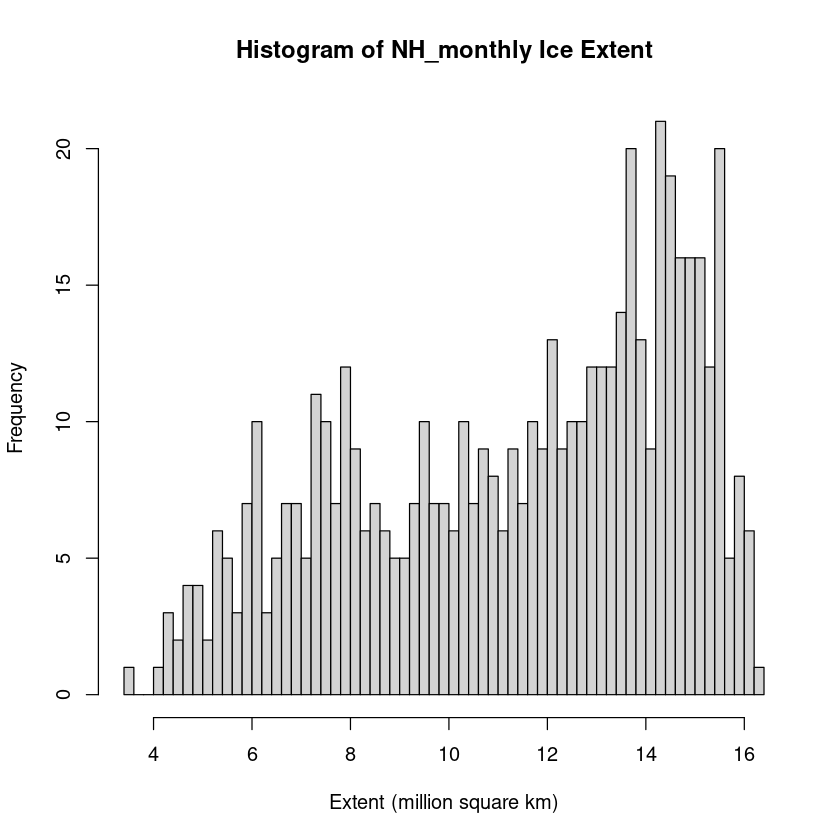

In [ ]:
# Make a histogram of NH_monthly
hist(NH_monthly$extent_NH, main = "Histogram of NH_monthly Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 80)

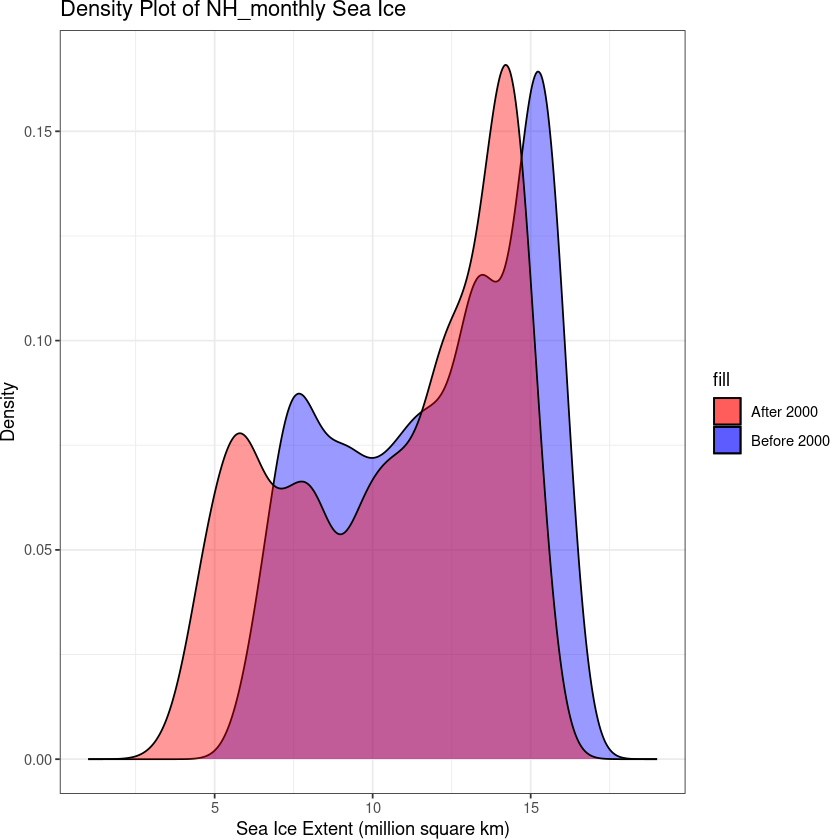

In [ ]:
# Filter NH_monthly data before 2000
NH_monthly_before_2000 <- NH_monthly[NH_monthly$date < as.Date("2000-01-01"), ]

# Filter NH_monthly data after 2000
NH_monthly_after_2000 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01"), ]

# Create a new plot with both density plot, I used bandwidth parameter of 0.6
density2groups <- ggplot() +
  geom_density(data = NH_monthly_before_2000, aes(x = extent_NH, fill = "Before 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_after_2000, aes(x = extent_NH, fill = "After 2000"), alpha = 0.4,bw=0.6) +
  xlab("Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Sea Ice") +
  scale_fill_manual(values = c("Before 2000" = "blue", "After 2000" = "red")) +
  xlim(1, 19) +
  theme_bw() +
  theme(plot.margin = margin(l = 0, r = 0))

#ggsave("density2groups.png", plot = density2groups, width = 10, height = 4)
print(density2groups)

# I used the bandwidth of 0.6 in the density plot.
# The bandwidth determine the plot smoothness
# The bandwidth is same as the parameter of 'bins number' in a histogram so there is no value as 'The correct one'
# I tried till I found one that fit the need
# The code below provide an interactive interface to choose a bandwidth.

# data(NH_monthly, package = "MASS")
# source("http://homepage.divms.uiowa.edu/~luke/classes/STAT7400/examples/shinydens.R")
# shinyDens(NH_monthly$extent_NH)

# The code source
# https://homepage.divms.uiowa.edu/~luke/classes/STAT4580-2020/dists.html

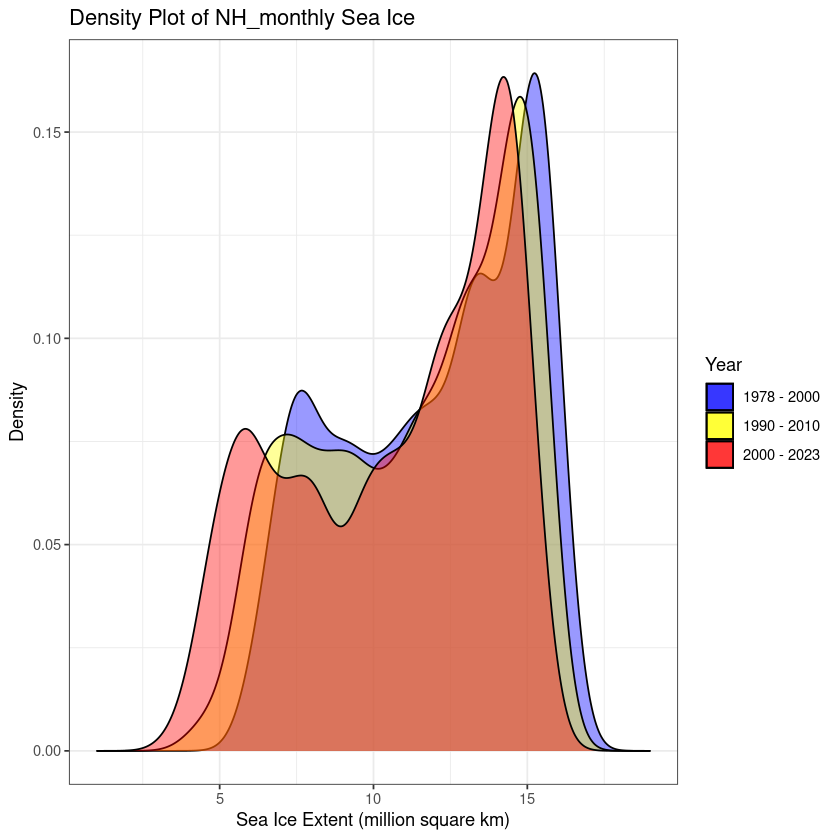

In [ ]:
# Filter NH_monthly data from 1978 to 2000
NH_monthly_1978_2000 <- NH_monthly[NH_monthly$date >= as.Date("1978-01-01") & NH_monthly$date < as.Date("2000-01-01"),]

# Filter NH_monthly data from 1990 to 2010
NH_monthly_1990_2010 <- NH_monthly[NH_monthly$date >= as.Date("1990-01-01") & NH_monthly$date < as.Date("2010-01-01"),]

# Filter NH_monthly data from 2000 to 2023
NH_monthly_2000_2023 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01") & NH_monthly$date < as.Date("2023-01-01"),]

# Create a new plot with three density plots
ggplot() +
  geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
  xlab("Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Sea Ice") +
  scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
  guides(fill = guide_legend(title = "Year")) +
  xlim(1, 19) +
  theme_bw()

In [ ]:
# # Save the three density plots as png images then combine them in one gif

# ggsave(filename = "1978_to_2000.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   xlab("Sea Ice Extent (million square km)") +
#   ylab("Density") +
#   labs(title = "Density Plot of NH_monthly Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "1990_to_2010.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   xlab("Sea Ice Extent (million square km)") +
#   ylab("Density") +
#   labs(title = "Density Plot of NH_monthly Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "2000_to_2023.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
#   xlab("Sea Ice Extent (million square km)") +
#   ylab("Density") +
#   labs(title = "Density Plot of NH_monthly Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())


# # Create a list of the three image filenames
# image_files <- c("1978_to_2000.png", "1990_to_2010.png", "2000_to_2023.png")

# # Combine the images into an animated gif
# gifski::gifski(image_files, gif_file = "NH_Monthly_gif_3_phases.gif")

Here is the animated gif for the periods 1978_to_2000, 1990_to_2010, and 2000_to_2023:

![animated gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/NH_Monthly_gif_3_phases.gif)

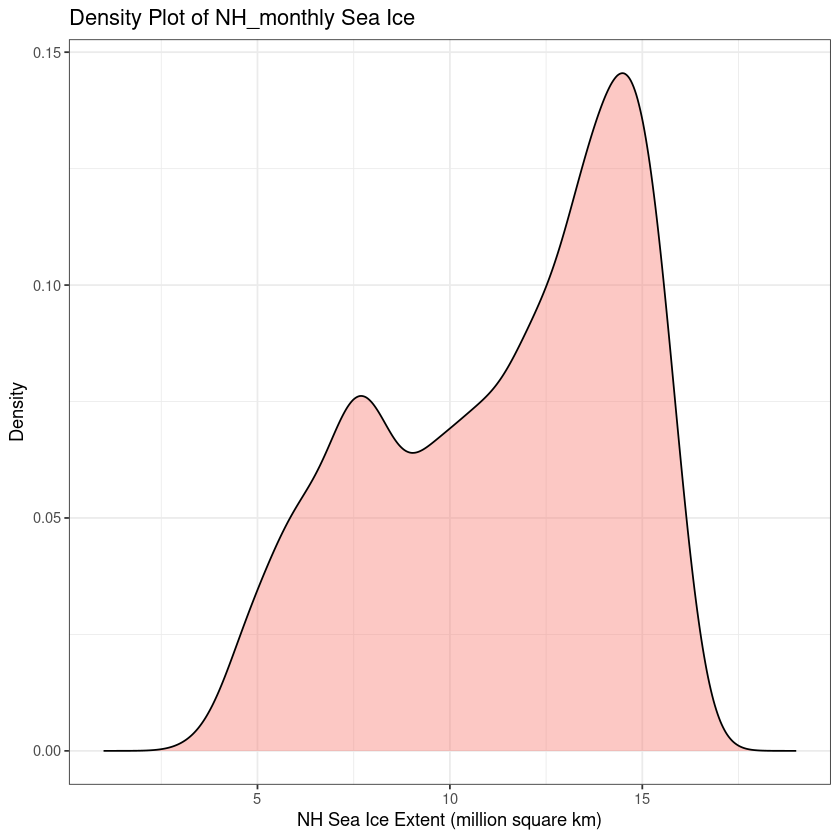

In [ ]:
plot_to_animate <- ggplot() +
  geom_density(data = NH_monthly, aes(x = extent_NH, fill = "blue"), alpha = 0.4,bw=0.6) +
  xlab("NH Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Sea Ice") +
  xlim(1, 19) +
  theme_bw()+
  theme(legend.position = "none")

print(plot_to_animate)

In [ ]:
# # I learned this animation in R from
# # https://www.datanovia.com/en/blog/gganimate-how-to-create-plots-with-beautiful-animation-in-r/

# theme_set(theme_bw())

# animated_plot <- plot_to_animate + transition_time(year) +
#   labs(title = "Year: {frame_time}") +
#   shadow_wake(wake_length = 0.1, alpha = FALSE)

# # Render the animation as a GIF
# animation_monthly_NH <- animate(animated_plot, renderer = gifski_renderer(), width = 800, height = 600)

# # Save the animated GIF
# anim_save("animation_monthly_NH.gif", animation_monthly_NH)

Here is the animated histogram for a year by year

![animated_plot.gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/animation_monthly_NH.gif)




### Annual North Hemisphere sea ice ``NH_annual``

In [ ]:
# Calculate the annual average value based on NH_monthly
NH_annual <- aggregate(extent_NH ~ year, data = NH_monthly, FUN = mean)

# Convert the year column to date format
NH_annual$year <- as.Date(paste0(NH_annual$year, "-06-15"))

# Remove the first and last year from NH_annual because there are no enough measurments in 1978 and 2023 yet
NH_annual <- NH_annual[-c(1, nrow(NH_annual)), ]

NH_annual

,year,extent_NH
,<date>,<dbl>
2,1979-06-15,12.34958
3,1980-06-15,12.34958
4,1981-06-15,12.14725
5,1982-06-15,12.46733
6,1983-06-15,12.35308
7,1984-06-15,11.92042
8,1985-06-15,12.01592
9,1986-06-15,12.22450
10,1987-06-15,12.20550


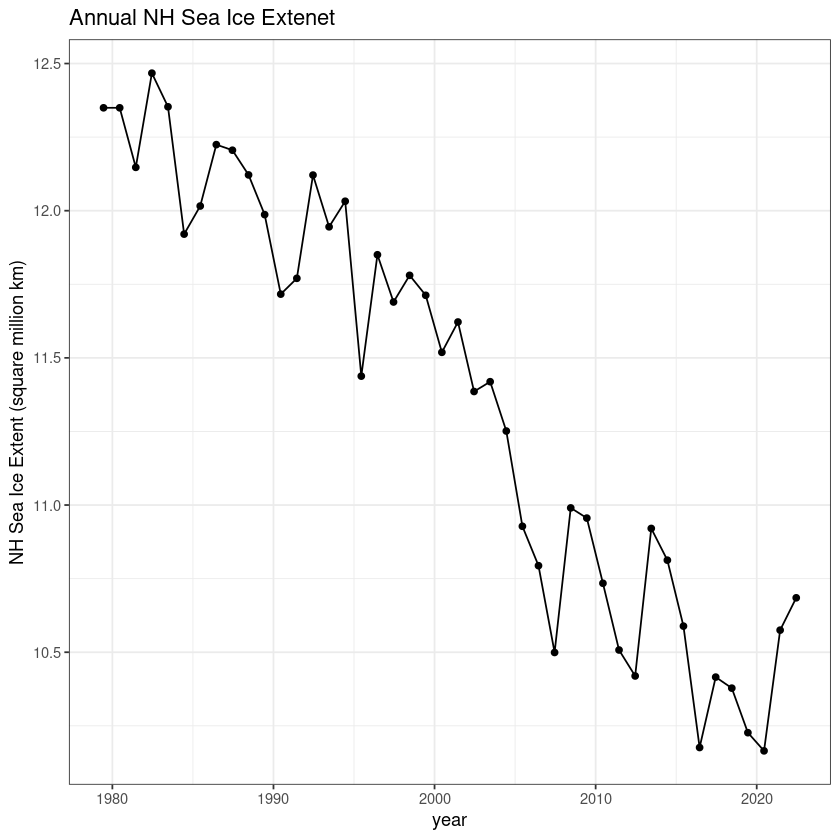

In [ ]:
ggplot(NH_annual, aes(x = year, y = extent_NH)) +
  geom_line() +
  geom_point() +
  labs(y = "NH Sea Ice Extent (square million km)", title="Annual NH Sea Ice Extenet")

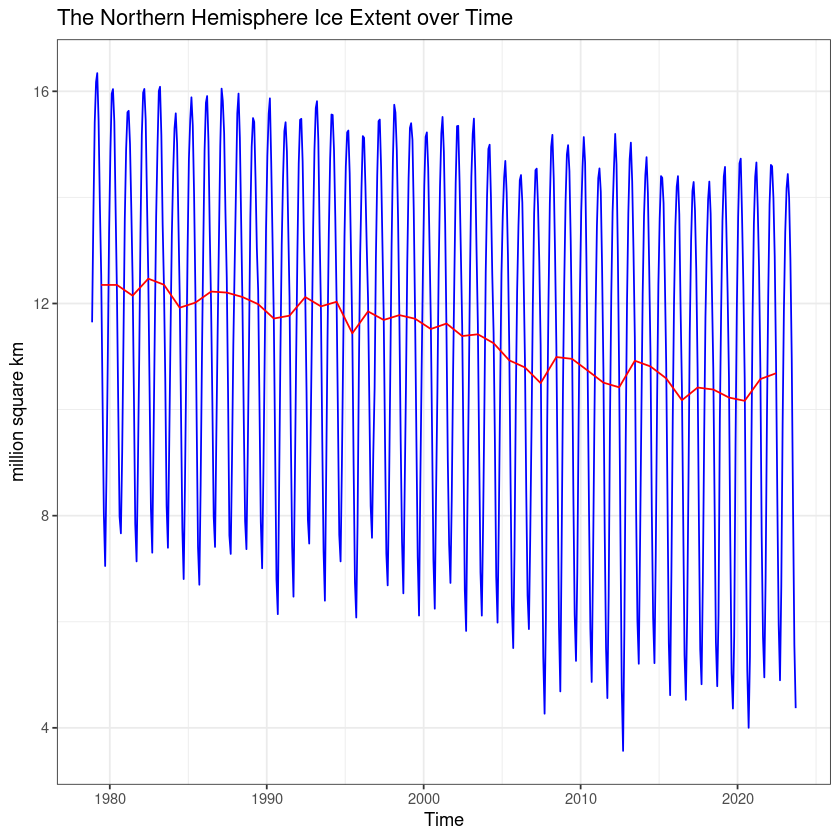

In [ ]:
ggplot() +
  geom_line(data = NH_monthly, aes(x = date, y = extent_NH), color = "blue") +
  geom_line(data = NH_annual, aes(x = year, y = extent_NH), color = "red") +
  xlab("Time") +
  ylab("million square km") +
  labs(title = "The Northern Hemisphere Ice Extent over Time")


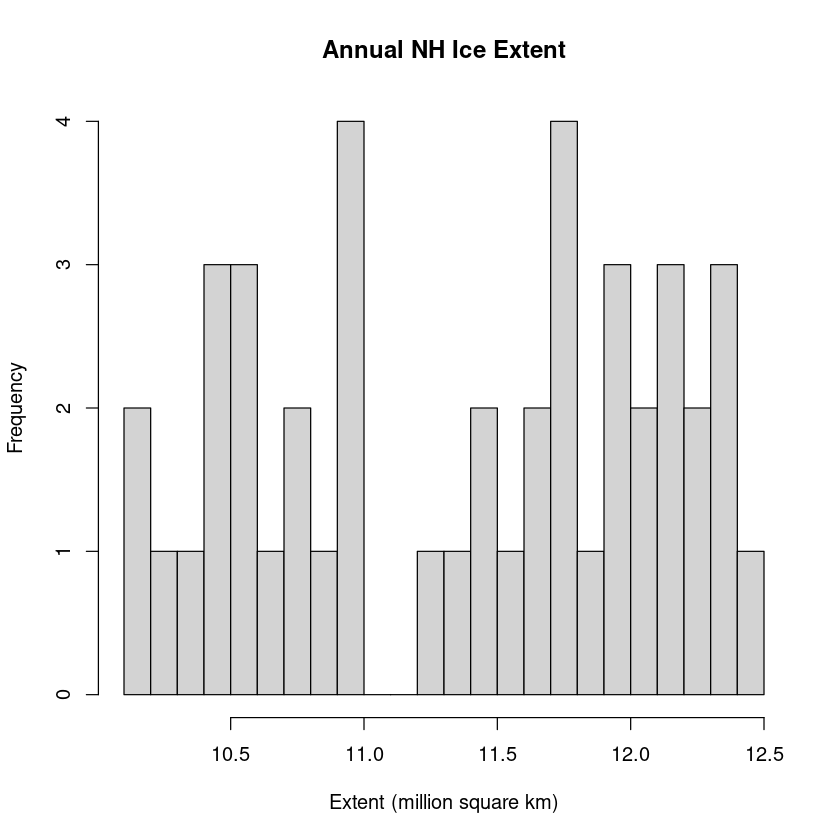

In [ ]:
# Make a histogram of the data in NH annual
hist(NH_annual$extent_NH, main = "Annual NH Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 20)

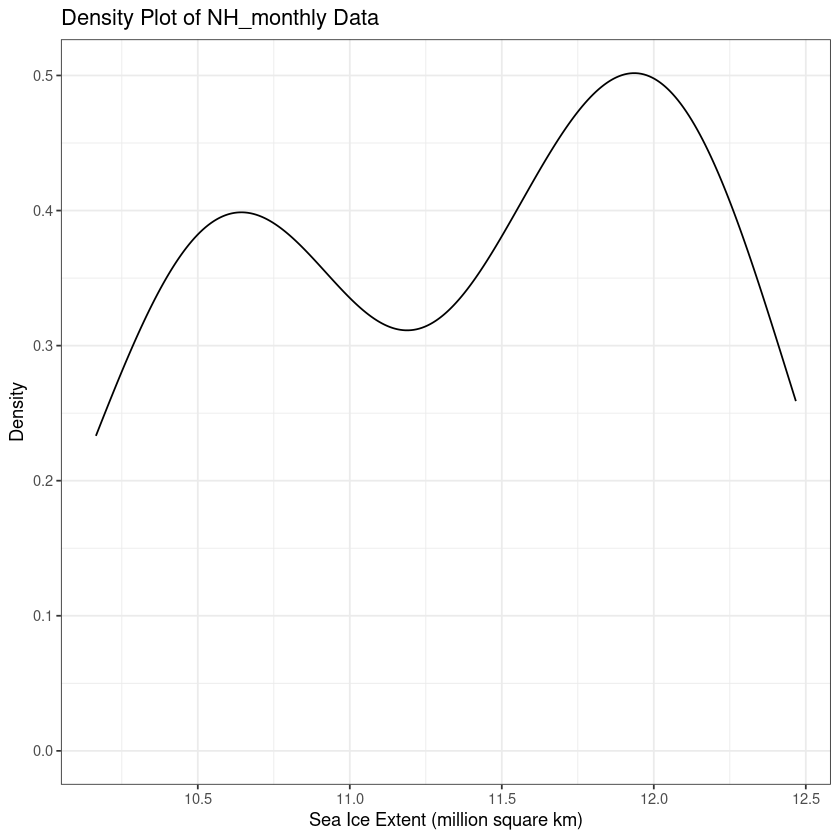

In [ ]:
ggplot(data = NH_annual, aes(x = extent_NH)) +
  geom_density() +
  xlab("Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Data")

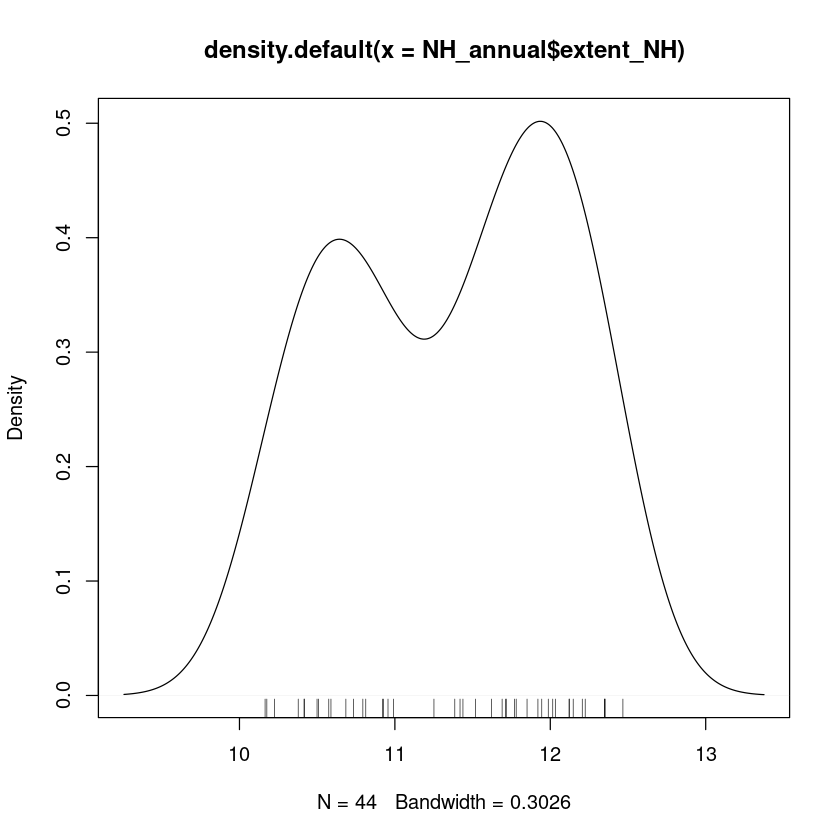

In [ ]:
# I learned about density plot from
# https://clauswilke.com/dataviz/histograms-density-plots.html
# https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/histdens.html
plot(density(NH_annual$extent_NH))
rug(jitter(NH_annual$extent_NH))

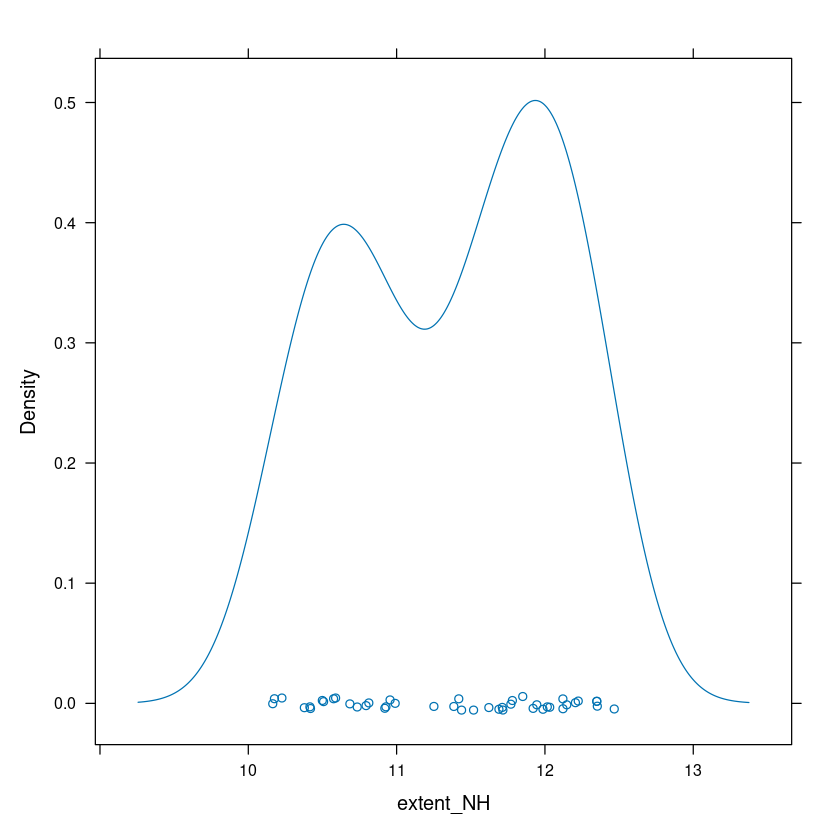

In [ ]:
library(lattice)
densityplot(~ extent_NH, data = NH_annual)